In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors

In [2]:
path = r'../Data_minus'
file_PINN = r'\PINN_minus_result.npz'
file_CD = r'\cd_PINN_minus_result.npz'
file_test = r'\testing_data.npz'
file_loss_PINN = r'\PINN_minus_loss.npz'
file_loss_CD = r'\cd_PINN_minus_loss.npz'
data_test, data_PINN, data_CD = np.load(path+file_test), np.load(path+file_PINN), np.load(path+file_CD)
data_loss_PINN, data_loss_CD = np.load(path+file_loss_PINN), np.load(path+file_loss_CD)
U_test, u_test = data_test['arr2'], data_test['arr3']
u_test_PINN, u_test_CD = data_PINN['arr5'], data_CD['arr5']
U_test_PINN, U_test_CD = u_test_PINN.reshape(-1, 1), u_test_CD.reshape(-1, 1)
loss_PINN, loss_PINN_cd, mse_PINN = data_loss_PINN['arr1'], data_loss_PINN['arr5'] + data_loss_PINN['arr6'], data_loss_PINN['arr7']
loss_CD, loss_CD_cd, mse_CD = data_loss_CD['arr1'], data_loss_CD['arr5'] + data_loss_CD['arr6'], data_loss_CD['arr7']

In [4]:
iters_noCD = np.arange(0, len(loss_PINN)) * 100
iters_CD = np.arange(0, len(loss_CD)) * 100
error_NRMSE_PINN = np.linalg.norm(U_test_PINN - U_test, 2) / np.linalg.norm(U_test, 2)
error_NRMSE_CD = np.linalg.norm(U_test_CD - U_test, 2) / np.linalg.norm(U_test, 2)
error_MSE_PINN = np.mean((U_test_PINN - U_test) ** 2)
error_MSE_CD = np.mean((U_test_CD - U_test) ** 2)

print(f'MSE PINN: {error_MSE_PINN:.4e}, MSE cd-PINN: {error_MSE_CD:.4e}')
print(f'NRMSE PINN: {error_NRMSE_PINN:.4e}, NRMSE cd-PINN: {error_NRMSE_CD:.4e}')

MSE PINN: 3.8290e-02, MSE cd-PINN: 1.1295e-02
NRMSE PINN: 1.2250e-01, NRMSE cd-PINN: 6.6531e-02


In [5]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['svg.fonttype'] = 'none'
x_test = np.linspace(-10.0, 10.0, 40)
t_test = np.linspace(0.0, 1.0, 20)
sigmas = np.linspace(0.1, 10.0, 100)
mus = np.linspace(-5.0, 5.0, 101)
mae_pinn = -np.log10(np.mean(np.abs(u_test_PINN - u_test), axis=(0, 1)))
mae_cd = -np.log10(np.mean(np.abs(u_test_CD - u_test), axis=(0, 1)))
vmin = 2.0
vmax = 3.0
boundaries = np.linspace(vmin, vmax, 20)
norm = colors.Normalize(vmin=vmin, vmax=vmax)

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


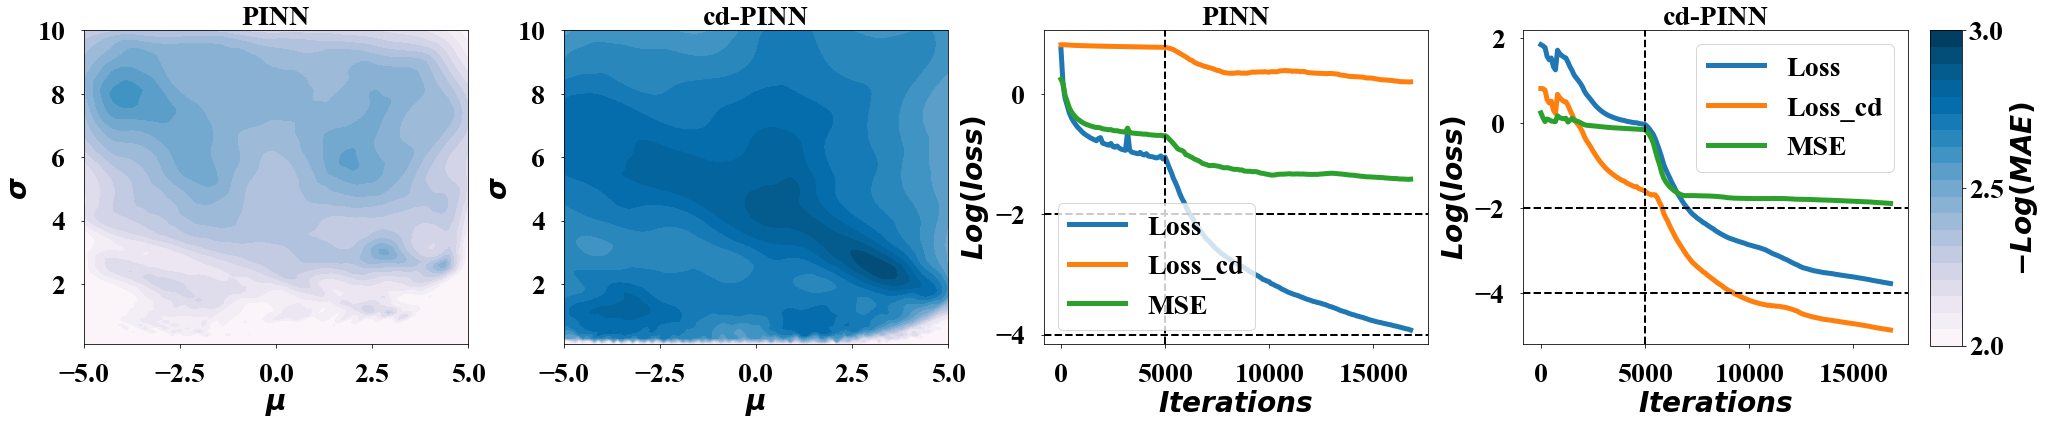

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(30, 6))
cmap = 'PuBu'

# PINN
mae_pinn = np.clip(mae_pinn, vmin, vmax)
im1 = axes[0].contourf(mus, sigmas, mae_pinn, cmap=cmap, norm=norm, levels=boundaries)
axes[0].set_title('PINN', fontsize=28, fontweight='bold')
axes[0].set_xlabel('$\mu$', fontsize=28)
axes[0].set_ylabel('$\sigma$', fontsize=28)
axes[0].tick_params('both', labelsize=28, pad=15)

# cd-PINN
mae_cd = np.clip(mae_cd, vmin, vmax)
im1 = axes[1].contourf(mus, sigmas, mae_cd, cmap=cmap, norm=norm, levels=boundaries)
axes[1].set_title('cd-PINN', fontsize=28, fontweight='bold')
axes[1].set_xlabel('$\mu$', fontsize=28)
axes[1].set_ylabel('$\sigma$', fontsize=28)
axes[1].tick_params('both', labelsize=28, pad=15)

axes[2].plot(iters_noCD, np.log10(loss_PINN), label='Loss', linewidth=5)
axes[2].plot(iters_noCD, np.log10(loss_PINN_cd), label='Loss_cd', linewidth=5)
axes[2].plot(iters_noCD, np.log10(mse_PINN), label='MSE', linewidth=5)
axes[2].axvline(x=5000, color='black', linestyle='--', linewidth=2)
axes[2].axhline(y=-4, color='black', linestyle='--', linewidth=2)
axes[2].axhline(y=-2, color='black', linestyle='--', linewidth=2)
axes[2].set_title('PINN', fontsize=28, fontweight='bold')
axes[2].legend(fontsize=28)
axes[2].set_xlabel('$Iterations$', fontsize=28)
axes[2].set_ylabel('$Log(loss)$', fontsize=28)
axes[2].tick_params('both', labelsize=28, pad=15)

axes[3].plot(iters_noCD, np.log10(loss_CD)[:len(loss_PINN)], label='Loss', linewidth=5)
axes[3].plot(iters_noCD, np.log10(loss_CD_cd)[:len(loss_PINN)], label='Loss_cd', linewidth=5)
axes[3].plot(iters_noCD, np.log10(mse_CD)[:len(loss_PINN)], label='MSE', linewidth=5)
axes[3].axvline(x=5000, color='black', linestyle='--', linewidth=2)
axes[3].axhline(y=-4, color='black', linestyle='--', linewidth=2)
axes[3].axhline(y=-2, color='black', linestyle='--', linewidth=2)
axes[3].set_title('cd-PINN', fontsize=28, fontweight='bold')
axes[3].legend(fontsize=28)
axes[3].set_xlabel('$Iterations$', fontsize=28)
axes[3].set_ylabel('$Log(loss)$', fontsize=28)
axes[3].tick_params('both', labelsize=28, pad=15)
fig.subplots_adjust(left=0.035, right=0.95, top=0.95, bottom=0.1, wspace=0.15, hspace=0.25)
cbar_ax = fig.add_axes([0.895, 0.19, 0.015, 0.73])
cbar = fig.colorbar(im1, cax=cbar_ax)
cbar.set_ticks(np.arange(vmin, vmax + 0.5, 0.5))  # 每隔 0.5 标一次
cbar.ax.tick_params(labelsize=28)
cbar.set_label('$-Log(MAE)$', fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.89, 1])
plt.show()

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


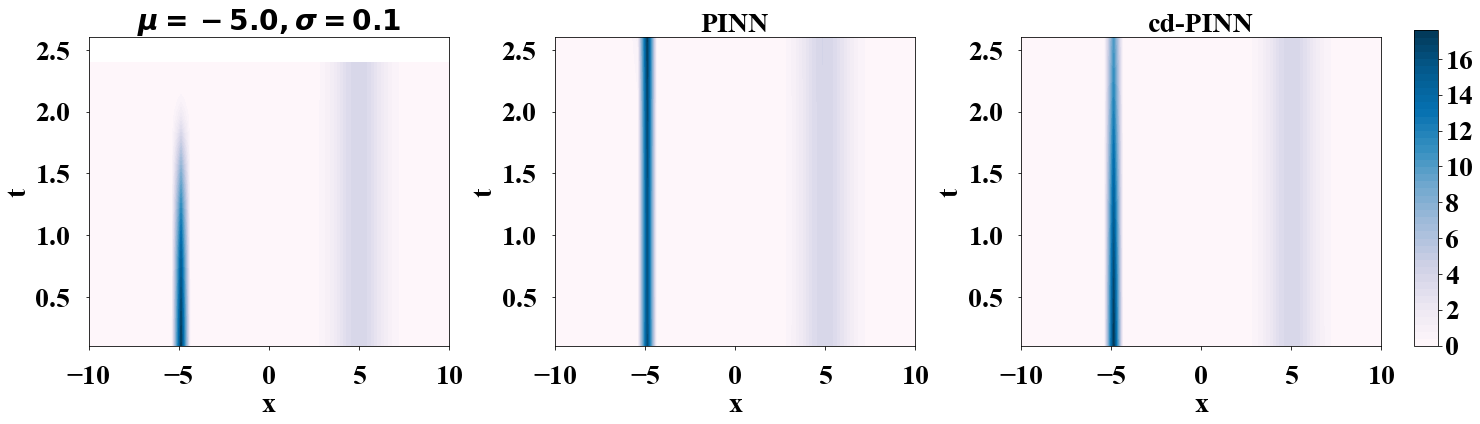

In [7]:
file_test_extra = r'\testing_data_extra.npz'
file_CD_extra = r'\cd_PINN_minus_result_extra.npz'
file_PINN_extra = r'\PINN_minus_result_extra.npz'

data_test_extra = np.load(path+file_test_extra)
data_CD_extra = np.load(path+file_CD_extra)
data_PINN_extra = np.load(path+file_PINN_extra)

t_test_extra = np.linspace(0.1, 2.6, 26)  # 从0.1开始
U_test_extra = data_test_extra['arr3']
U_test_CD_extra = data_CD_extra['arr5']
U_test_PINN_extra = data_PINN_extra['arr5']

fig, axes = plt.subplots(1, 3, figsize=(22, 6))
cmap = 'PuBu'

im0 = axes[0].contourf(x_test, t_test_extra, U_test_extra[:, :, 0, 0], cmap=cmap, levels=50)
axes[0].set_title(f'$\mu={mus[0]}, \sigma={sigmas[0]}$', fontsize=28, fontweight='bold')
axes[0].set_xlabel('x', fontsize=28, fontweight='bold')
axes[0].set_ylabel('t', fontsize=28, fontweight='bold')
axes[0].tick_params('both', labelsize=28, pad=15)

im1 = axes[1].contourf(x_test, t_test_extra, U_test_PINN_extra[:, :, 0, 0], cmap=cmap, levels=50)
axes[1].set_title(f'PINN', fontsize=28, fontweight='bold')
axes[1].set_xlabel('x', fontsize=28, fontweight='bold')
axes[1].set_ylabel('t', fontsize=28, fontweight='bold')
axes[1].tick_params('both', labelsize=28, pad=15)

im2 = axes[2].contourf(x_test, t_test_extra, U_test_CD_extra[:, :, 0, 0], cmap=cmap, levels=50)
axes[2].set_title(f'cd-PINN', fontsize=28, fontweight='bold')
axes[2].set_xlabel('x', fontsize=28, fontweight='bold')
axes[2].set_ylabel('t', fontsize=28, fontweight='bold')
axes[2].tick_params('both', labelsize=28, pad=15)

cbar_ax = fig.add_axes([0.895, 0.19, 0.015, 0.73])
cbar = fig.colorbar(im0, cax=cbar_ax)
cbar.ax.tick_params(labelsize=28)

plt.tight_layout(rect=[0, 0, 0.89, 1])
plt.show()